#### About Dataset:
The Tennis dataset is a classic example used in the context of decision tree algorithms and is often employed to illustrate their functionality in both educational and practical settings. It represents a simplified scenario where a tennis coach needs to decide whether to play tennis on a given day based on weather conditions.

The dataset typically consists of a small number of instances, each representing a day, and includes attributes such as outlook (e.g., sunny, overcast, rainy), temperature (e.g., hot, mild, cool), humidity (e.g., high, normal), and windy (e.g., true, false). The target variable is whether or not the tennis match was played on that day (e.g., yes, no).

In [1]:
import pandas as pd
df = pd.read_csv("tennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### ID3 (Iterative Dichotomiser 3):

ID3 is a classic decision tree operates by recursively partitioning the dataset based on the attribute that provides the highest Information Gain at each step. The goal is to maximize the homogeneity (reduce impurity) of the resulting subsets.

#### Entropy:
entropy(data): This function calculates the entropy of a dataset. Entropy is a measure of uncertainty or disorder in a set of data. It calculates the entropy for the target variable 'play' in this case.

#### Information Gain:
information_gain(data, attribute): This function calculates the information gain of a dataset with respect to a particular feature. Information gain measures the effectiveness of an feature in classifying the data. It calculates the difference between the total entropy and the average entropy of subsets formed by splitting the data based on the values of the specified feature.


In [2]:
import pandas as pd
import numpy as np

# Calculate entropy function
def entropy(data):
    classes = data.unique()
    entropy = 0
    total = len(data)
    for cls in classes:
        p_cls = len(data[data == cls]) / total
        entropy -= p_cls * np.log2(p_cls) if p_cls != 0 else 0
    return entropy


# Calculate information gain
def information_gain(data, feature):
    total_entropy = entropy(data['play'])
    values = data[feature].unique()
    subset_entropy = 0
    total = len(data)
    for value in values:
        subset = data[data[feature] == value]
        print(f"Subset for {feature} == {value}:\n", subset)
        print(f"Entropy({feature} == {value}) =", entropy(subset['play']))
        print(f"{len(subset)}/{total} * {entropy(subset['play'])} = {len(subset) / total * entropy(subset['play'])}")
        subset_entropy += len(subset) / total * entropy(subset['play'])
        print("\n")
    print("Total_entropy = ", total_entropy)
    print(f"Average information entropy({feature}) = ",subset_entropy)
    information_gain = total_entropy - subset_entropy
    print("Information Gain = Total_entropy - Avg info entropy")
    print(f"Information Gain({feature}) = ", information_gain)
    return information_gain

The following code then iterates over each feature in the dataset, calculates the information gain for each feature, and identifies the attribute with the highest information gain, which is considered the best feature to split the dataset for decision tree construction.

In [3]:
# Calculate information gain for each feature
information_gains = {}
for column in df.columns[:-1]:  # Exclude the target column
    information_gains[column] = information_gain(df, column)
    print("---------------------------------------------------------------")
print("\nInformation gain for each feature:")
print(information_gains)

# Find the feature with the highest information gain
best_feature = max(information_gains, key=information_gains.get)
print("\nBest feature to split the dataset:", best_feature)

Subset for outlook == sunny:
    outlook  temp humidity  windy play
0    sunny   hot     high  False   no
1    sunny   hot     high   True   no
7    sunny  mild     high  False   no
8    sunny  cool   normal  False  yes
10   sunny  mild   normal   True  yes
Entropy(outlook == sunny) = 0.9709505944546686
5/14 * 0.9709505944546686 = 0.3467680694480959


Subset for outlook == overcast:
      outlook  temp humidity  windy play
2   overcast   hot     high  False  yes
6   overcast  cool   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
Entropy(outlook == overcast) = 0.0
4/14 * 0.0 = 0.0


Subset for outlook == rainy:
    outlook  temp humidity  windy play
3    rainy  mild     high  False  yes
4    rainy  cool   normal  False  yes
5    rainy  cool   normal   True   no
9    rainy  mild   normal  False  yes
13   rainy  mild     high   True   no
Entropy(outlook == rainy) = 0.9709505944546686
5/14 * 0.9709505944546686 = 0.3467680694480959


Total

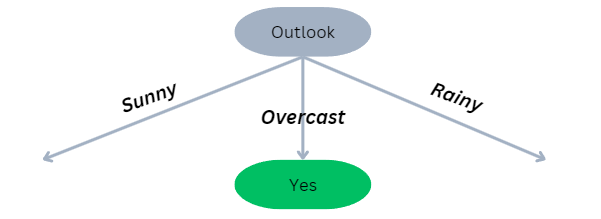

In [4]:
def subset_col(data, feature):
    values = data[feature].unique()
    total = len(data)
    subsets = {}
    for value in values:
        s = data[data[feature] == value]
        subsets[value] = s
    return subsets

The function subset_col(data, feature) is designed to create subsets of a dataset based on unique values of a specified feature. Here's a breakdown of what each part does:

data: This parameter represents the dataset on which you want to operate.

feature: This parameter specifies the column (feature) in the dataset based on which you want to create subsets.

In [5]:
outlook = subset_col(df, "outlook")

we now focus on the subset of data where the Outlook is "Sunny". Within this subset, we aim to find the feature that provides the highest information gain to further refine our decision tree.

In [6]:
# Calculate information gain for each feature
information_gains = {}
for column in outlook['sunny'].columns[1:-1]:  # Exclude the target and outlook column
    information_gains[column] = information_gain(outlook['sunny'], column)
    print("---------------------------------------------------------------")
print("\nInformation gain for each feature:")
print(information_gains)

# Find the feature with the highest information gain
best_feature = max(information_gains, key=information_gains.get)
print("\nBest feature to split the dataset:", best_feature)

Subset for temp == hot:
   outlook temp humidity  windy play
0   sunny  hot     high  False   no
1   sunny  hot     high   True   no
Entropy(temp == hot) = 0.0
2/5 * 0.0 = 0.0


Subset for temp == mild:
    outlook  temp humidity  windy play
7    sunny  mild     high  False   no
10   sunny  mild   normal   True  yes
Entropy(temp == mild) = 1.0
2/5 * 1.0 = 0.4


Subset for temp == cool:
   outlook  temp humidity  windy play
8   sunny  cool   normal  False  yes
Entropy(temp == cool) = 0.0
1/5 * 0.0 = 0.0


Total_entropy =  0.9709505944546686
Average information entropy(temp) =  0.4
Information Gain = Total_entropy - Avg info entropy
Information Gain(temp) =  0.5709505944546686
---------------------------------------------------------------
Subset for humidity == high:
   outlook  temp humidity  windy play
0   sunny   hot     high  False   no
1   sunny   hot     high   True   no
7   sunny  mild     high  False   no
Entropy(humidity == high) = 0.0
3/5 * 0.0 = 0.0


Subset for humidity == n

After splitting from the "Outlook" feature, specifically for the "Sunny" characteristic, the next optimal split is observed at the "Humidity" feature due to its high information gain.

The Humidity split reaches its final decision, indicating that no further splitting is performed.

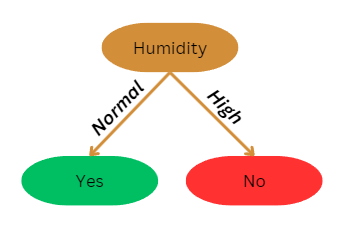

Similarly look at the subset of data where the Outlook is "Rainy". Within this subset, we aim to find the feature that provides the highest information gain to further refine our decision tree.

In [7]:
# Calculate information gain for each feature
information_gains = {}
for column in outlook['rainy'].columns[1:-1]:  # Exclude the target and outlook column
    information_gains[column] = information_gain(outlook['rainy'], column)
    print("---------------------------------------------------------------")
print("\nInformation gain for each feature:")
print(information_gains)

# Find the feature with the highest information gain
best_feature = max(information_gains, key=information_gains.get)
print("\nBest feature to split the dataset:", best_feature)

Subset for temp == mild:
    outlook  temp humidity  windy play
3    rainy  mild     high  False  yes
9    rainy  mild   normal  False  yes
13   rainy  mild     high   True   no
Entropy(temp == mild) = 0.9182958340544896
3/5 * 0.9182958340544896 = 0.5509775004326937


Subset for temp == cool:
   outlook  temp humidity  windy play
4   rainy  cool   normal  False  yes
5   rainy  cool   normal   True   no
Entropy(temp == cool) = 1.0
2/5 * 1.0 = 0.4


Total_entropy =  0.9709505944546686
Average information entropy(temp) =  0.9509775004326937
Information Gain = Total_entropy - Avg info entropy
Information Gain(temp) =  0.01997309402197489
---------------------------------------------------------------
Subset for humidity == high:
    outlook  temp humidity  windy play
3    rainy  mild     high  False  yes
13   rainy  mild     high   True   no
Entropy(humidity == high) = 1.0
2/5 * 1.0 = 0.4


Subset for humidity == normal:
   outlook  temp humidity  windy play
4   rainy  cool   normal  False

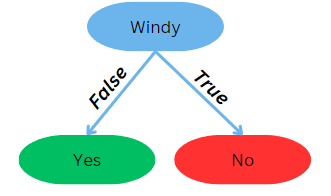

No further splits can be made as tree reached final  decisions in every branch("Yes"/"No").

In [8]:
humidity = subset_col(outlook['sunny'], "humidity")
humidity['high']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [9]:
humidity['normal']

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [10]:
windy = subset_col(outlook['rainy'], "windy")
windy[True]

,outlook,temp,humidity,windy,play
5,rainy,cool,normal,True,no
13,rainy,mild,high,True,no


In [11]:
windy[False]

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [12]:
df[df['outlook'] == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


Final Decision tree,

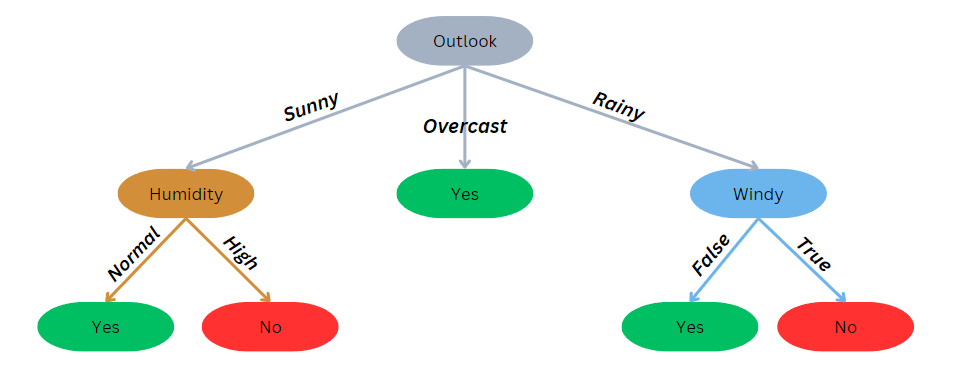